In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path="dataset/train"
data_test_path="dataset/test"
data_val_path="dataset/validation"


In [3]:
img_width=180
img_height=180

In [4]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 449 files belonging to 5 classes.


In [5]:
data_cat=data_train.class_names

In [6]:
data_cat

['barbell', 'dumbell', 'gym_ball', 'kettlebell', 'smith_machine']

In [7]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 50 files belonging to 5 classes.


In [8]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 48 files belonging to 5 classes.


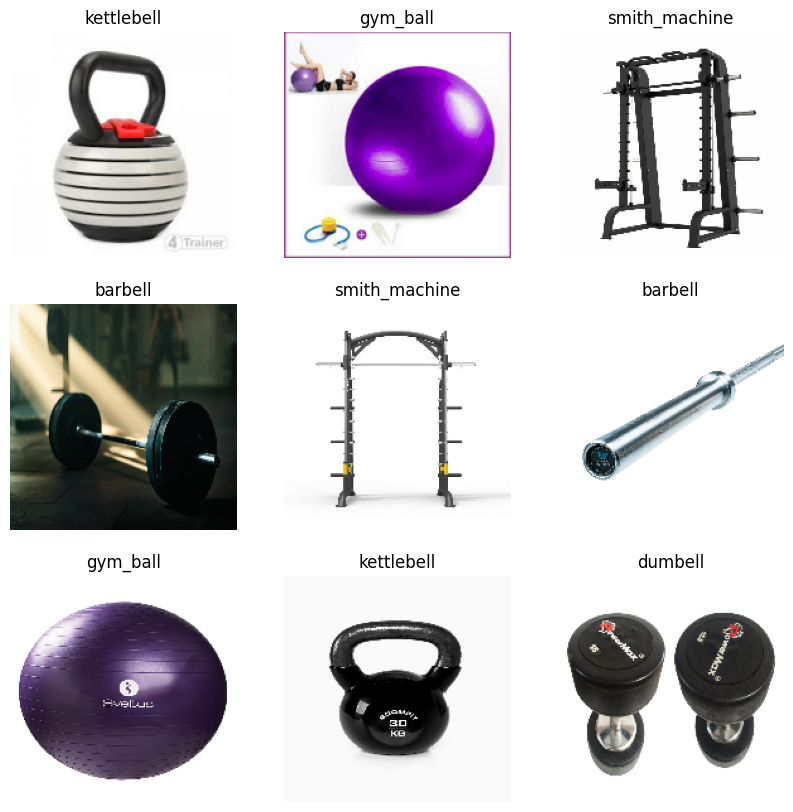

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load VGG16 without the top layers to customize it for our number of classes
base_model = VGG16(include_top=False, input_shape=(img_width, img_height, 3), weights='imagenet')

# Freeze the layers of the base model to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Creating the full model using the Sequential API
model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(data_cat), activation='softmax')
])

# Compile the model with the same optimizer and loss function as before
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Display the model's architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dropout_2 (Dropout)         (None, 12800)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               3277056   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 17,993,029
Trainable params: 3,278,341
N

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

NameError: name 'model' is not defined

In [15]:
epochs_size = 30
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/30


c:\Users\DELL\.conda\envs\tfGpu\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 19s 478ms/step - loss: 7.8470 - accuracy: 0.8352 - val_loss: 5.5908 - val_accuracy: 0.9000
Epoch 2/30
15/15 [==============================] - 4s 168ms/step - loss: 0.9903 - accuracy: 0.9800 - val_loss: 4.7544 - val_accuracy: 0.9200
Epoch 3/30
15/15 [==============================] - 3s 166ms/step - loss: 1.5066 - accuracy: 0.9777 - val_loss: 6.4765 - val_accuracy: 0.9200
Epoch 4/30
15/15 [==============================] - 3s 166ms/step - loss: 1.0796 - accuracy: 0.9889 - val_loss: 7.6433 - val_accuracy: 0.9200
Epoch 5/30
15/15 [==============================] - 3s 165ms/step - loss: 1.3457 - accuracy: 0.9889 - val_loss: 7.3113 - val_accuracy: 0.9000
Epoch 6/30
15/15 [==============================] - 3s 166ms/step - loss: 0.1434 - accuracy: 0.9978 - val_loss: 5.5526 - val_accuracy: 0.9400
Epoch 7/30
15/15 [==============================] - 3s 165ms/step - loss: 0.0318 - accuracy: 0.9978 - val_loss: 5.1229 - val_accuracy: 0.9400
Epoch 8/30
15/15

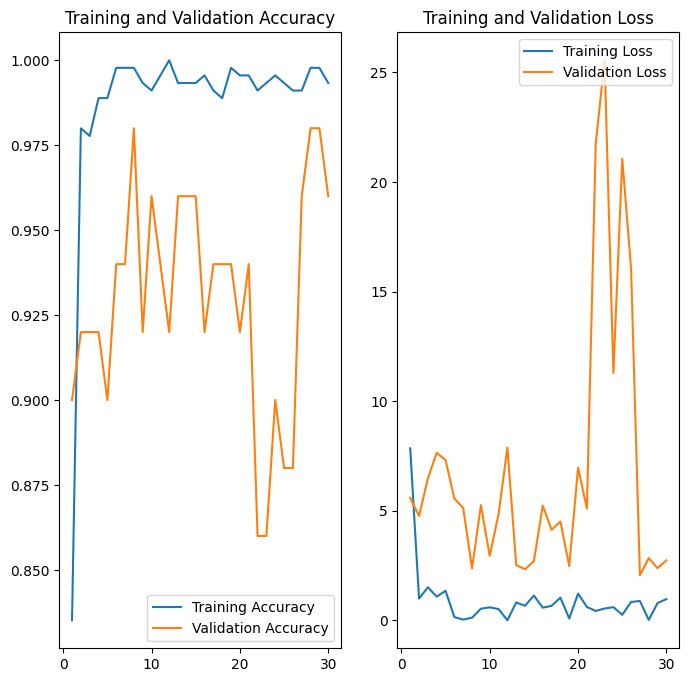

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(8, 8))

# Define epochs_range here
epochs_range = range(1, epochs_size + 1)

axs[0].plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
axs[0].plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
axs[0].legend(loc='lower right')
axs[0].set_title('Training and Validation Accuracy')

axs[1].plot(epochs_range, history.history['loss'], label='Training Loss')
axs[1].plot(epochs_range, history.history['val_loss'], label='Validation Loss')
axs[1].legend(loc='upper right')
axs[1].set_title('Training and Validation Loss')

plt.show()



In [ ]:
import tensorflow as tf

# Assuming img_height and img_width are defined somewhere in your code
img_height, img_width = 180, 180  # Example values, adjust as needed

# Load the image file
user_upload = "dataset/user_upload/img2.jpg"
image = tf.keras.utils.load_img(user_upload, target_size=(img_height, img_width))

# Convert the PIL Image to a NumPy array
img_arr = tf.keras.preprocessing.image.img_to_array(image)

# Expand dimensions to add the batch size as the first dimension
img_bat = tf.expand_dims(img_arr, 0)


In [ ]:
predict=model.predict(img_bat)

1/1 [==============================] - 0s 239ms/step


In [ ]:
score=tf.nn.softmax(predict)

In [ ]:
print('The object  in the  image is {} with accuracy of {:0.2f}%'.format(data_cat[np.argmax(score)],np.max(score)*100))

The object  in the  image is smith_machine with accuracy of 40.43%


In [ ]:
model.save('imageclassification231.keras')